# pystan part 2


## flip a coin

In [6]:
%load_ext autoreload
%autoreload 2
import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set()  
np.random.seed(101)

import arviz

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
coin_dat = {
             'n': 100, # number of total coins
             'y': 61,  # we put in advance an imbalance (just to make it more interesting)
            }

sm  = pystan.StanModel(file="../stan_scripts/coin.stan")
fit = sm.sampling( data=coin_dat, 
                  iter=1000, 
                  chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_aeeb0494fd89755208ea26dd2704eb83 NOW.


In [4]:
print(fit)

Inference for Stan model: anon_model_aeeb0494fd89755208ea26dd2704eb83.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

       mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
p       0.6  5.2e-3   0.05    0.5   0.56    0.6   0.63   0.69     96    1.0
lp__ -70.32    0.06   0.76 -72.45 -70.55 -70.03  -69.8 -69.74    151   1.01

Samples were drawn using NUTS at Sun Jun 14 18:26:02 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [5]:
# here is a variation from the part 1 . we can use fit.extract() to obtain a python dictionary, just in case we need it

coin_dict = fit.extract()
print( "keys ", coin_dict.keys())
# lp_ is the log posterior

keys  odict_keys(['p', 'lp__'])


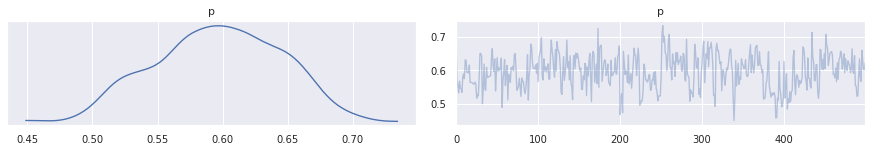

In [8]:
# also, we can plot the trace (in this case for p ) directly using arviz package and calling:
arviz.plot_trace(fit)
plt.show()

## estimate normal dist 

In [9]:
norm_dat = {
             'n': 100,
             'y': np.random.normal(10, 2, 100),
            }

sm  = pystan.StanModel(file="../stan_scripts/normal.stan")
fit = sm.sampling(data=norm_dat, 
                  iter=1000, 
                  chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e6e73372f50983933ca26f2c221c334a NOW.


In [10]:
print(fit)

Inference for Stan model: anon_model_e6e73372f50983933ca26f2c221c334a.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu     10.33  9.8e-3   0.19   9.97  10.19  10.34  10.46   10.7    382    1.0
sigma   2.11  6.7e-3   0.14   1.86   2.01   2.11   2.19   2.41    419    1.0
lp__  -120.7    0.05   0.87 -123.1 -121.0 -120.4 -120.1 -119.9    314    1.0

Samples were drawn using NUTS at Sun Jun 14 18:33:25 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


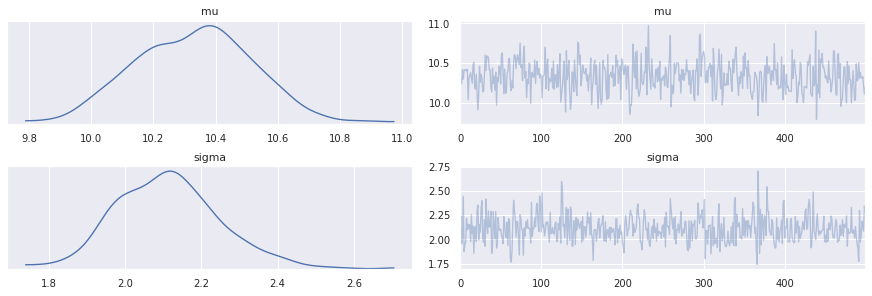

In [12]:
arviz.plot_trace(fit)
plt.show()

In [14]:
trace = fit.extract() # trace is a dict with keys: mu, sigma

In [15]:
#  map optimizer

In [16]:
sm = pystan.StanModel(file="../stan_scripts/normal.stan")
norm_dat = {
             'n': 100,
             'y': np.random.normal(10, 2, 100),
            }
op = sm.optimizing(data=norm_dat)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e6e73372f50983933ca26f2c221c334a NOW.


In [19]:
print(op)

OrderedDict([('mu', array(10.11166077)), ('sigma', array(2.10472734))])
